In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#Задание 1 Загрузите файл HR.csv в pandas dataframe (5)

In [ ]:
url = 'https://drive.google.com/file/d/1JexZd7XP8qdaqHI2bxM-CxNdHeTwpAPZ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=',')

df.head()
#df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) (10)

In [ ]:
## 2) Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). (10)


### Расчет среднего
Mean_items = df.mean()
print("Среднее по расчетным переменным:\n",Mean_items)

### Расчет медианы
Median_items = df.median()
print("\nМедиана по расчетным переменным:\n",Median_items)

### Расчет моды
pd.options.display.max_columns = 50
Mode_items=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].mode()
print("\nМода по расчетным переменным:\n",Mode_items, "\n")

### Расчет мин макс
Min_items = df.min(numeric_only=True )
Max_items = df.max(numeric_only=True )
print("\nМин по расчетным переменным:\n",Min_items)
print("\nМакс по расчетным переменным:\n",Max_items)

### Расчет среднего отклонения
Std_items = df.std(numeric_only=True)
print("\nСреднее отклонение по расчетным переменным:\n",Std_items, "\n")

### Если прочие показатели не мешают, то удобнее их анализировать в таблице
df.describe()


Среднее по расчетным переменным:
 satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

Медиана по расчетным переменным:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

Мода по расчетным переменным:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  
0               

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#Задание 3 Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные. (10)




3а) Рассчитать и визуализировать корреляционную матрицу для количественных переменных.(10)

Корреляционная матрица
                       satisfaction_level last_evaluation number_project average_montly_hours time_spend_company Work_accident  left promotion_last_5years
satisfaction_level                  100%             11%           -14%                  -2%               -10%            6%  -39%                    3%
last_evaluation                      11%            100%            35%                  34%                13%           -1%    1%                   -1%
number_project                      -14%             35%           100%                  42%                20%           -0%    2%                   -1%
average_montly_hours                 -2%             34%            42%                 100%                13%           -1%    7%                   -0%
time_spend_company                  -10%             13%            20%                  13%               100%   

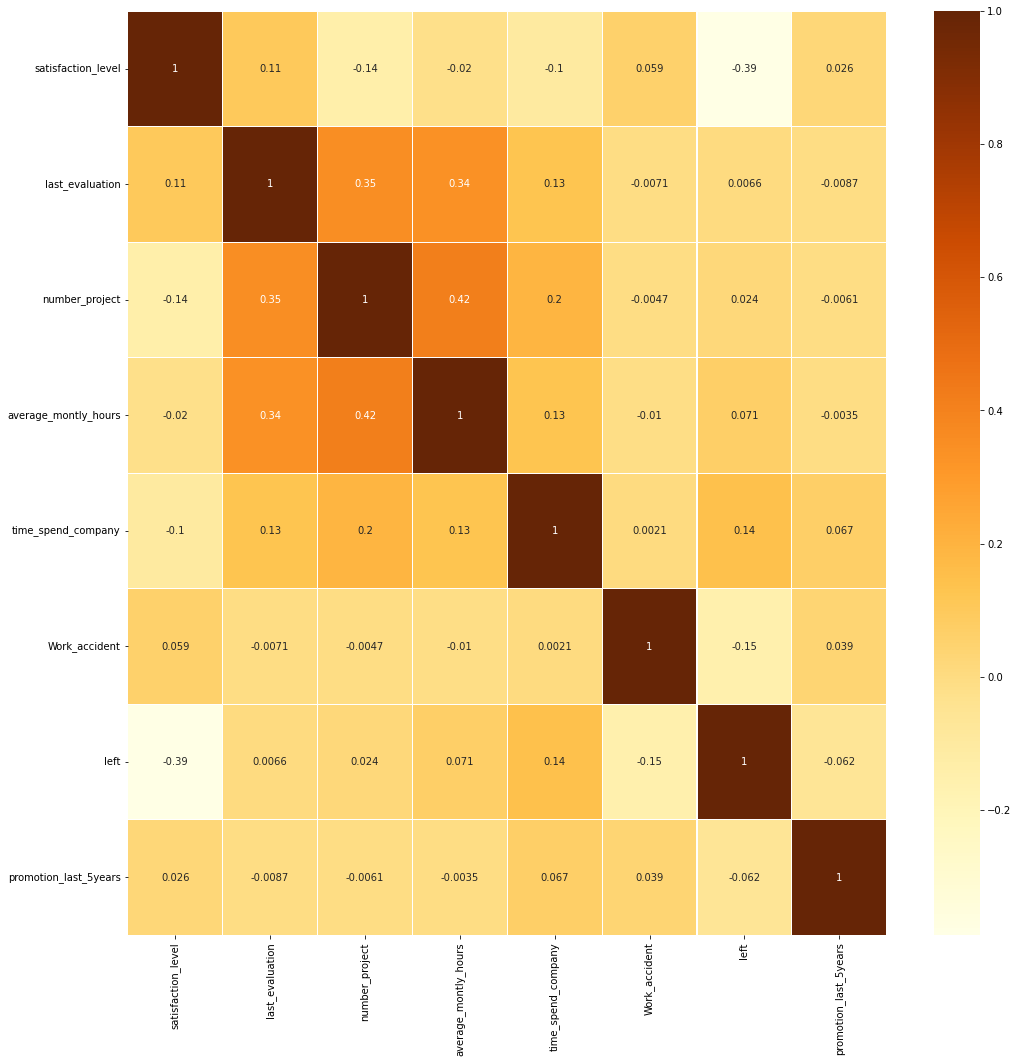

3б) Определите: две самые скоррелированные и две наименеескоррелированные переменные.


Наибольшая корреляция наблюдается между:
 - average_monthly_hours и number_project - 42%
 - number project и last evaluation - 35%


Наименьшая корреляция наблюдается между:
 - time_spend_company и Work_accident - 0,21%
 - average_monthly_hours и promotion_last_5years - 0,35%



In [129]:
print("3а) Рассчитать и визуализировать корреляционную матрицу для количественных переменных.(10)\n") 

### Отбираем количественные колонки
df_matrix = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

### Установка опции для показа всех значений в строку без переноса
pd.set_option('expand_frame_repr', False)

### Печать корреляционной матрицы в процентах
corrM = df_matrix.corr().applymap("{:.0%}".format)
print("Корреляционная матрица\n", corrM, "\n")

### Выбор палитры для хитмэпа и установка визуализации корреляционной матрицы
sns.color_palette("YlOrBr", as_cmap=True)
HeatMapChart = sns.heatmap(df_matrix.corr(),annot=True,cmap="YlOrBr",linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(17,17)

#HeatMapChart.set_title('Визуализация - корреляционная матрица')
plt.show()

print("3б) Определите: две самые скоррелированные и две наименеескоррелированные переменные.\n") 
print("\nНаибольшая корреляция наблюдается между:\n - average_monthly_hours и number_project - 42%\n - number project и last evaluation - 35%\n")
print("\nНаименьшая корреляция наблюдается между:\n - time_spend_company и Work_accident - 0,21%\n - average_monthly_hours и promotion_last_5years - 0,35%\n")

#Задание 4 Рассчитайте сколько сотрудников работает в каждом департаменте (5)

In [128]:
### Расчет количества сотрудников в каждом департаменте
df['department'].value_counts(ascending=True)

management      630
hr              739
accounting      767
RandD           787
marketing       858
product_mng     902
IT             1227
support        2229
technical      2720
sales          4140
Name: department, dtype: int64

#Задание 5,6 Показать распределение сотрудников по зарплатам.(5+5)

Сводная таблица распределений по зарплатам 

 None
department    IT  RandD  accounting   hr  management  marketing  product_mng  sales  support  technical    All
salary                                                                                                        
high          83     51          74   45         225         80           68    269      141        201   1237
low          609    364         358  335         180        402          451   2099     1146       1372   7316
medium       535    372         335  359         225        376          383   1772      942       1147   6446
All         1227    787         767  739         630        858          902   4140     2229       2720  14999


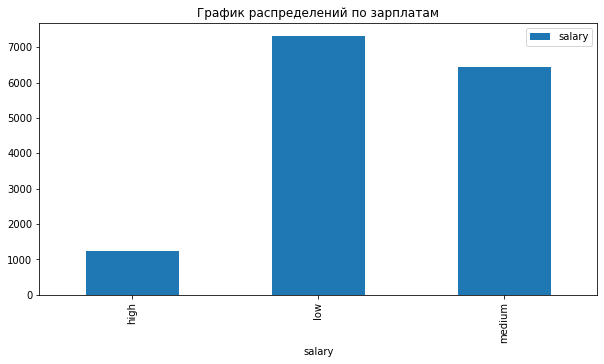

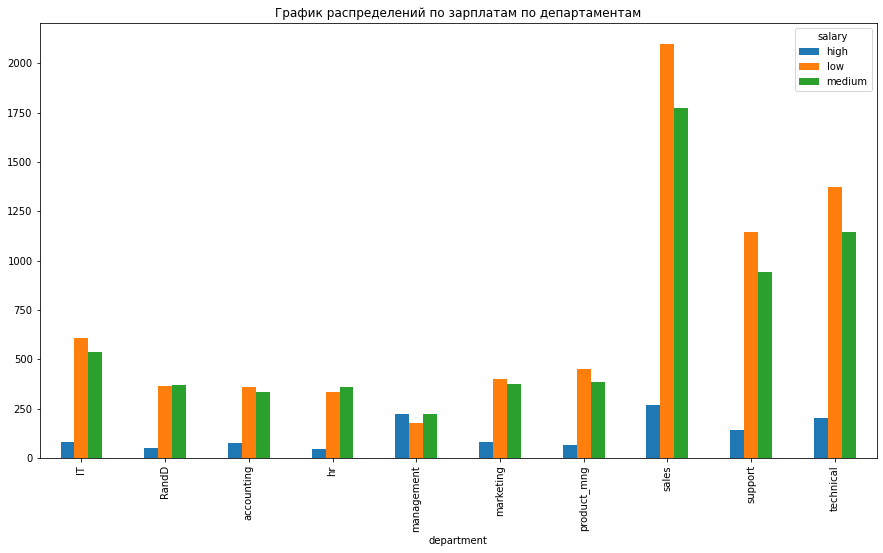

In [ ]:
### Установка опции для показа всех значений в строку без переноса
pd.set_option('expand_frame_repr', False)
#pd.options.display.max_columns = 20

### Формирование сводной таблицы
print("Сводная таблица распределений по зарплатам \n\n",table)
table = print(pd.pivot_table(df, values='left', index=['salary'],
                    columns=['department'], aggfunc='count', fill_value=0, margins=True))
### Формирование фрейма для графика в разрезе департаментов
df2 = df[['department','salary']]

### Формирование графика по зарплатам
#df2.salary.count().plot.bar(figsize=(23,8),legend=True, title='График распределений по зарплатам')
#print("gfdf", df2.salary.count())
df2.groupby(['salary']).salary.count().plot.bar(figsize=(10,5),legend=True, title='График распределений по зарплатам')

### Формирование графика по зарплатам
df2.groupby(['department','salary']).salary.count().unstack().plot.bar(figsize=(15,8),legend=True, title='График распределений по зарплатам по департаментам')


#Задание 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10)

In [125]:
### Формирование сводной таблицы
table = pd.pivot_table(df, values='average_montly_hours', index=['salary'], aggfunc='sum', fill_value=0, margins=False).sort_values(by='average_montly_hours', ascending=True)
print("Гипотеза не верна - сотрудники с высоким окладом проводят на работе меньше времени\n\n",table)

Гипотеза не верна - сотрудники с высоким окладом проводят на работе меньше времени

         average_montly_hours
salary                      
high                  247236
medium               1297827
low                  1470491


#Задание 8 Показатели уволившихся и неуволившихся сотрудников (10)

In [ ]:
## 8) Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# а) Доля сотрудников с повышением за последние 5 лет 
PromotionNumber = df['promotion_last_5years'].sum()
AllNumber = df['promotion_last_5years'].count()
PromotionInd = PromotionNumber/AllNumber
PromotionInd = PromotionInd.round(3)
print("8а) Доля сотрудников с повышением за 5 лет - ", PromotionInd)

# б) Средняя степень удовлетворенности
print("8б) Средняя степень удовлетворенности - ", df['satisfaction_level'].mean())

# в) Среднее количество проектов
print("8в) Среднее количество проектов - ", round(df['number_project'].astype('float').mean(), 0))
#ProjectMeanNumber.round(0)
#df.describe()


8а) Доля сотрудников с повышением за 5 лет -  0.021
8б) Средняя степень удовлетворенности -  0.6128335222348166
8в) Среднее количество проектов -  4.0


#Задание 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки (20)

In [180]:
# а) Разделить данные на тестовую и обучающую выборки

## Отбираем количественные колонки для x (факторы влияющие) и y (фактор фактический)
df_lda_x = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
df_lda_y = df['left']

## разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df_lda_x, df_lda_y, test_size=0.3)

## обучаем данные
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

## делаем прогноз на тестовой выборке
X_test_predict = lda.predict(X_test)

## Сравниваем прогноз и факт
compar = pd.DataFrame([X_test_predict, y_test]).T
compar.columns = ['Forecast', 'Fact']
print(compar)

## Проверка точности
accuracy_score(y_test, X_test_predict)


      Forecast  Fact
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0
...        ...   ...
4495         0     1
4496         0     0
4497         0     0
4498         0     0
4499         0     0

[4500 rows x 2 columns]


0.7604444444444445

#Задание 10 Загрузить jupyter notebook с решение на github и прислать ссылку (5)

In [ ]:
print("Файл загружен на github - ссылка выслана")